<a href="https://colab.research.google.com/github/jash-ai/PYTHON/blob/main/decision_tree_practical_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Introduction to Decision Trees

Let's import the packages that we will use during the practical:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### The dataset

The dataset is available in the `data/` directory, but it can be also downloaded from [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing). It consists of data from marketing campaigns of a Portuguese bank. We will try to build a classifier that can predict whether or not the client targeted by the campaign ended up subscribing to a term deposit (column `y`).

Load the file `data/bank-marketing.c` with `pandas` and check the distribution of the target `y`. Here the separator is `';'` instead of a comma.

Save the DataFrame as `df`.

In [2]:
# Your code here...
##df = pd.read_csv("data/bank-marketing.csv",sep=";")
df = pd.read_csv("bank-marketing.csv",sep=";")
df['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


The dataset is imbalanced, so we will need to keep that in mind when building our models!

Now split the data into the feature matrix `X` (all features except `y`) and the target vector `y`, making sure that you convert `yes` to `1` and `no` to `0`.

In [4]:
# Get X, y
# Your code here...
y = df["y"].map({"no":0, "yes":1})
X = df.drop("y", axis=1)


Here is the list of features in our `X` matrix:

| | | |
| --- | --- | --- |
age | | numeric
job | type of job | categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'
marital | marital status | categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
education | | categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'
default | has credit in default? | categorical: 'no','yes','unknown'
housing | has housing loan? | categorical: 'no','yes','unknown'
loan | has personal loan? | categorical: 'no','yes','unknown'
contact | contact communication type | categorical: 'cellular','telephone'
month | last contact month of year | categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'
day_of_week | last contact day of the week | categorical: 'mon','tue','wed','thu','fri'
duration | last contact duration, in seconds | numeric. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
campaign | number of contacts performed during this campaign and for this client | numeric, includes last contact
pdays | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted
previous | number of contacts performed before this campaign and for this client | numeric
poutcome | outcome of the previous marketing campaign | categorical: 'failure','nonexistent','success'
emp.var.rate | employment variation rate - quarterly indicator | numeric
cons.price.idx | consumer price index - monthly indicator | numeric
cons.conf.idx | consumer confidence index - monthly indicator | numeric
euribor3m | euribor 3 month rate - daily indicator | numeric
nr.employed | number of employees - quarterly indicator | numeric

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: y
Non-Null Count  Dtype
--------------  -----
41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


Note the comment about the `duration` feature. We will exclude it from our analysis.

Drop `duration` from `X`:

In [7]:
# Your code here...
 # drop column  duration from X dataframe
X.drop("duration", inplace=True, axis=1)


In [8]:
##duration will no longer be there in X dataframe
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [9]:
##X does not contain duration column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [10]:
X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [11]:
y.dtypes

dtype('int64')

Now we can check the types of all our features. We see that some seem to be categorical whilst others are numerical. We will keep two lists, one for each type, so we can preprocess them differently.

In [12]:
# when there is a third class "unknown", we'll process the feature as non-binary categorical
num_features = ["age", "campaign", "pdays", "previous", "emp.var.rate",
                "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]

cat_features = ["job", "marital", "education","default", "housing", "loan",
                "contact", "month", "day_of_week", "poutcome"]

### Visualise the numerical features

Using `seaborn`, show a boxplot of the numerical features.

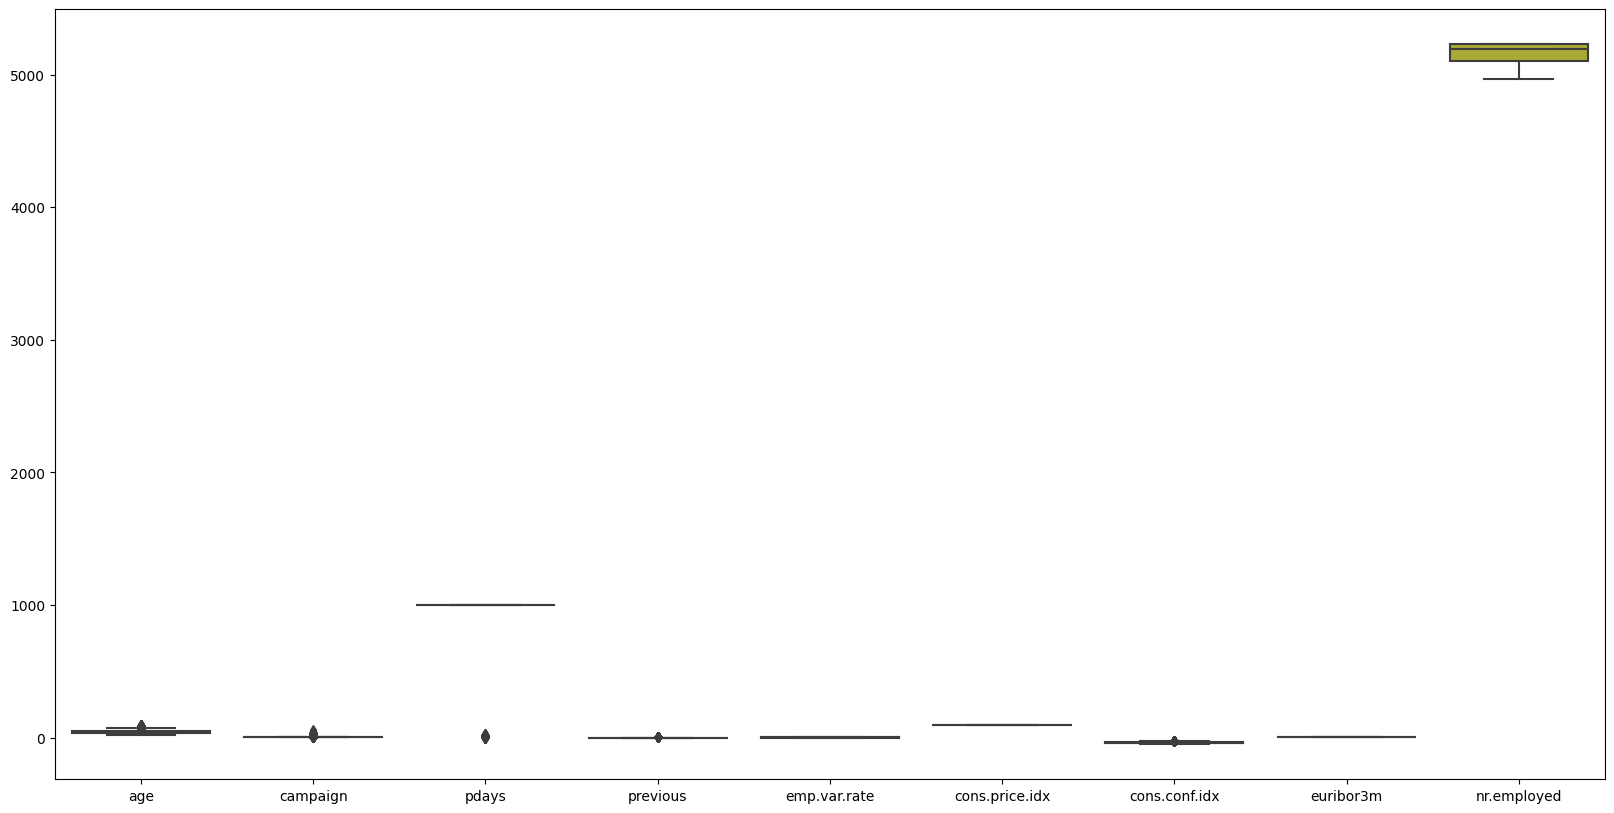

In [13]:
# Your code here...
plt.figure(figsize=(20, 10))
sns.boxplot(data=X[num_features], ax=plt.gca())
plt.show()


The features aren't at the same scale. But that's fine for tree-based methods as we've said in the lesson, so we do not need to do any scaling here!

### One-hot encoding on categorical features

**JK NOTES ON**

The `sklearn` implementation of decision trees cannot work directly with categorical features, so we need to make sure our dataset contains only numbers. Consequently, we will need to transform our categorical features into one-hot encoded features.

To do so, use `pd.get_dummies` on our DataFrame (select only the categorical features - we already have them stored in the variable `cat_features`) to generate the new columns.

Assign the new DataFrame to a variable `X_categorical`.

In [14]:
# Your code here...
##ALL CATERGORICAL COLUMNS ARE NOW SPLIT
X_categorical = pd.get_dummies(X[cat_features])


In [15]:
X_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_admin.                     41188 non-null  uint8
 1   job_blue-collar                41188 non-null  uint8
 2   job_entrepreneur               41188 non-null  uint8
 3   job_housemaid                  41188 non-null  uint8
 4   job_management                 41188 non-null  uint8
 5   job_retired                    41188 non-null  uint8
 6   job_self-employed              41188 non-null  uint8
 7   job_services                   41188 non-null  uint8
 8   job_student                    41188 non-null  uint8
 9   job_technician                 41188 non-null  uint8
 10  job_unemployed                 41188 non-null  uint8
 11  job_unknown                    41188 non-null  uint8
 12  marital_divorced               41188 non-null  uint8
 13  marital_married 

Create a Dataframe with only our numerical features (we have their names stored in the variable `num_features`) from `X` together with the `X_categorical` DataFrame.

Use `pd.concat` (making sure to specify the correct axis!) and call the new DataFrame `X_processed`.

In [16]:
X_processed = pd.concat([X[num_features], X_categorical], axis=1)


In [17]:
##this now includes all the num_features and the X_categorical features
##ALL DTYPE ARE EITHER INT OR FLOAT

X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [18]:
##for categorical columns the outputs are either 1 or 0
## for numerial columns the outputs are the values they were given at the start (original output)
X_processed

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


### Split the data into training and test sets

Split the data (use `X_processed`) into a training set and test set. Here we are dealing with an imbalanced dataset, so it is important to enforce stratification. We will use the argument `stratify` from `train_test_split` to do so (check the documentation).

Call the new variables `X_train`, `X_test`, `y_train`, and `y_test`.

**JK NOTES** ON

IMPORTANT OF ***sklearn.model_selection import train_test_split***

The train_test_split function from sklearn.model_selection in Python's scikit-learn library is a powerful tool used for splitting a dataset into two subsets: one for training a machine learning model and another for testing or validation.

This function allows you to divide your dataset into two parts: one for training the model to learn patterns and relationships within the data and another for evaluating the model's performance. This evaluation subset helps you assess how well your model generalizes to new, unseen data.

Here's a breakdown of its purpose and parameters:

**Purpose:**
Dataset Splitting: Divides a dataset into training and testing sets.

**Randomization**: Shuffles the dataset before splitting to ensure randomness in the selection of samples for both sets.

# **Parameters:**

**X and y:** The input features (X) and target variable (y).

**test_size:** Specifies the proportion of the dataset to allocate for testing. For instance, test_size=0.2 reserves 20% of the data for testing and uses 80% for training.

**train_size:** Alternative to test_size, specifies the training set size explicitly. If train_size is provided, test_size is computed as 1 - train_size. Dont need to specify as it can be calculated 80% of data .8.

**random_state:** Sets a seed for the random number generator. Ensures that the splitting is reproducible if the same value is used across multiple runs.

**stratify:** Optional parameter used for stratified sampling. Maintains the distribution of classes in the target variable within both the training and testing sets.

# **JK NOTES** ON
IMPORTANT OF ***STRATIFY*** WHEN USING TRAIN_TEST_SPLIT


In Python, train_test_split is a function from the sklearn.model_selection module that's commonly used to split a dataset into training and testing subsets for machine learning models. The stratify parameter in train_test_split is used to ensure that the splitting process maintains the proportion of classes or labels in the dataset across the training and testing sets.

When you set stratify=y, where y represents the labels or classes of your dataset, train_test_split will split the dataset in a way that preserves the distribution of these labels in both the training and testing sets. This is especially useful when dealing with classification problems where you have imbalanced classes.

For instance, if you have a dataset with 70% samples belonging to class A and 30% samples belonging to class B, using stratify=y ensures that both the training and testing sets will have a similar distribution of classes. This helps prevent situations where one set has a disproportionate representation of certain classes, which could potentially bias the model during training or evaluation.

This code splits the dataset into training and testing sets (X_train, X_test) along with their corresponding labels (y_train, y_test). The stratify=y parameter ensures that the distribution of labels in y_train and y_test resembles the distribution of labels in the original dataset y.

# ***JK NOTES*** ON
IMPORTANT OF ***RANDOM STATE*** WHEN USING TRAIN_TEST_SPLIT

 In Python's train_test_split function from the sklearn.model_selection module, the random_state parameter is used to control the randomization applied during the splitting of the dataset into training and testing subsets.

When you set the random_state parameter to a specific value (an integer), it ensures reproducibility of the split. The splitting algorithm employs randomness to shuffle the data before creating the training and testing sets. Specifying a random_state value makes the randomness predictable, ensuring that every time you run the train_test_split function with the same random_state, you'll get the same split.

This can be particularly useful for debugging, testing, or ensuring consistency in results across different runs of your code. It helps in scenarios where you want to perform experiments or analyses on the same data split multiple times without changing the dataset's partition.

Setting random_state=42 here ensures that the split will always be the same whenever this code is executed with the same dataset X and y. Changing the random_state value would result in a different but consistent split as long as the random_state remains constant across runs.

Remember, the specific value you use for random_state doesn’t matter as long as it's the same across runs if you want reproducible splits. It's common to use numbers like 0, 1, or any other integer value.

# **JK NOTES** ON
IMPORTANT OF ***TEST SIZE*** WHEN USING TRAIN_TEST_SPLIT

In Python's train_test_split function from the sklearn.model_selection module, the test_size parameter determines the proportion of the dataset that will be allocated to the testing set after the split.

This parameter takes a float value between 0.0 and 1.0, representing the fraction of the dataset that should be reserved for testing. For example:

Here, test_size=0.3 means that 30% of the dataset will be used for testing, while the remaining 70% will be used for training the model.

Adjusting the test_size parameter allows you to control the size of the testing set relative to the training set. The larger the testing set, the less data is available for training the model, and vice versa. It's important to strike a balance; having too little data for training might lead to an underfit model, while having too little for testing might result in inaccurate estimates of the model's performance.

A common practice is to use ratios like 0.2 (20% for testing, 80% for training) or 0.3 (30% for testing, 70% for training), but the choice ultimately depends on the size of your dataset and the specific requirements of your machine learning task.

In [19]:
# Your code here...
# X_test  has 30% of the data (indicated by test_size =.3)
# X_train has 70% of the data

#means that 30% of the dataset will be used for testing (X_test),
#while the remaining 70% (X_train) will be used for training the model.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=.3,
    random_state=42,
    stratify=y
)


In [20]:
##main dataset has 41188 records
##70% of 41188 is 28831
## 30% of 41188 is 12357

X_processed.shape

(41188, 62)

In [21]:
##showing total add up to 28831 + 12357 = 41188
28831 + 12357

41188

In [22]:
## 70% of 41188 is 28831
X_train.shape

(28831, 62)

In [23]:
## 30% of 41188 is 12357
X_test.shape

(12357, 62)

In [24]:
y_train.shape

(28831,)

In [25]:
y_test.shape

(12357,)

## Train a decision tree

Now that we have done our preprocessing and our data is ready, we can train a decision tree. We will use `DecisionTreeClassifier` from `sklearn.tree`.

For now we will keep our tree unconstrained with:
- `max_depth=None`
- `min_samples_split=2`

**JK NOTES ON**

**sklearn.tree import DecisionTreeClassifier**

The DecisionTreeClassifier is a classification algorithm available in scikit-learn's sklearn.tree module. It's based on the concept of a decision tree, a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome or class label.


***Decision Tree Algorithm Overview:***

**Classification:** DecisionTreeClassifier is specifically designed for classification tasks where the goal is to predict the class or category of a given input.

**Splitting:** The tree is built by recursively splitting the dataset based on features that best separate the classes.

**Node Impurity:** It uses measures like Gini impurity or entropy to determine the best split at each node. The split that maximizes the purity of resulting nodes (homogeneity within nodes) is selected.

**Tree Depth:** The depth of the tree determines how deep the decision-making process goes. A deeper tree might lead to overfitting, while a shallow tree might oversimplify and underfit the data.

**Predictions:** Once the tree is built, during prediction, the input sample traverses the tree from the root to a leaf node, and the class label associated with that leaf node is assigned to the input.

***Key Parameters of DecisionTreeClassifier:***

**criterion:** The function to measure the quality of a split. It can be "gini" for Gini impurity or "entropy" for information gain.

**max_depth:** Controls the maximum depth of the tree to avoid overfitting.

**min_samples_split:** The minimum number of samples required to split an internal node.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node.

**max_features: **The number of features to consider when looking for the best split.

***Advantages and Considerations:***

**Interpretability:** Decision trees are easily interpretable and visualizable, allowing insight into feature importance and decision-making.
Handling Non-linear Relationships: They can handle non-linear relationships between features and the target.

**Overfitting:** Without proper tuning, decision trees can easily overfit the training data, especially if the tree is allowed to grow without constraints (max_depth, min_samples_split, etc.).

**JK NOTES ON**

The function to measure the quality of a split. It can be **"gini"** for Gini impurity or **"entropy"** for information gain.

The criterion parameter in the DecisionTreeClassifier of scikit-learn is used to specify the measure used to evaluate the quality of a split at each node of the decision tree. It helps the algorithm determine which feature to split on and where to make these splits in the tree-building process.

There are two commonly used criteria for evaluating the quality of a split in decision trees:

**1. Gini Impurity:**
criterion='gini'
Gini impurity measures the degree of impurity or disorder in a set of samples.
It quantifies the probability of incorrectly classifying a randomly chosen element if it was randomly labeled according to the class distribution in the set.
A split with lower Gini impurity is preferred as it results in more homogeneous subsets after the split.

Mathematically, for a node with classes



p
1
​
 ,p
2
​
 ,...,p
k
​
  (where

p
i
​
  is the proportion of samples belonging to class

i):

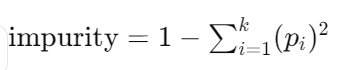![image.png]()

**2. Entropy (Information Gain):**
criterion='entropy'
Entropy measures the average amount of information or uncertainty in a set of samples.
It calculates the information gain, which quantifies the reduction in entropy after the split. A higher information gain indicates a more informative split.
It is based on information theory concepts and aims to maximize the mutual information between the features and the target variable.

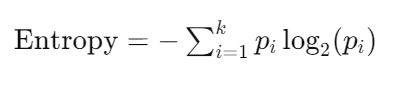

**Choosing Between Gini Impurity and Entropy:**
Both Gini impurity and entropy are commonly used and generally yield similar results.
The choice between the two often doesn't have a significant impact on the model's performance.
Empirical studies or domain-specific knowledge might influence the selection, but in many cases, it's reasonable to try both and select based on cross-validation performance or computational efficiency.

In scikit-learn's DecisionTreeClassifier, you can specify criterion='gini' or criterion='entropy' based on your preference or experimentation to build decision trees using the respective impurity measures to guide the splitting process.

**DecisionTreeClassifier**
 is a powerful algorithm used in various machine learning applications. Proper tuning of its parameters is crucial to prevent overfitting and achieve better generalization on unseen data.

**JK NOTES ON**

**DecisionTreeClassifier(max_depth=None, min_samples_split=2)**



The DecisionTreeClassifier in scikit-learn allows for various parameters to be set during its instantiation. Two commonly used parameters are **max_depth ** and **min_samples_split**. bold text

**max_depth:**

It specifies the maximum depth of the decision tree.
When max_depth is set to None, the nodes are expanded until all leaves are pure (i.e., contain only samples from a single class) or until all leaves contain fewer samples than min_samples_split.
Setting max_depth helps control the depth of the tree, preventing it from growing excessively deep, which can lead to overfitting by capturing noise in the training data.

**min_samples_split:**

It defines the minimum number of samples required to split an internal node.
By default, it's set to 2, meaning that the node won't split further if it contains fewer samples than min_samples_split.
This parameter helps control the decision-making process by preventing the creation of nodes that have too few samples, reducing overfitting.

In this example, a DecisionTreeClassifier is created with max_depth=None, allowing the tree to expand until all leaves are pure or contain fewer samples than min_samples_split, and min_samples_split=2, meaning nodes won't split further if they contain fewer than two samples.

These parameters can significantly impact the performance and complexity of the decision tree model. max_depth controls how deep the tree grows, affecting its complexity and tendency to overfit, while min_samples_split controls the granularity of the splits, preventing the creation of nodes that might be too specific to the training data. Adjusting these parameters requires a balance between model complexity and its ability to generalize to unseen data.

Create a new decision tree, assigning it to the variable `dtc`.

In [26]:
# Your code here...
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2)


**JK NOTES ON**

**fit(X_train, y_train) in decision tree**

In scikit-learn, the fit() method is used to train machine learning models, including the DecisionTreeClassifier.

**fit(X_train, y_train):**

**X_train:** This parameter represents the training data, typically consisting of features or input variables. It's a 2-dimensional array-like structure where rows represent samples and columns represent features.

**y_train:** This parameter represents the target labels corresponding to the training data X_train. For a classification task, y_train contains the class labels or target variable associated with each sample in X_train.

When you call **fit(X_train, y_train)** on a DecisionTreeClassifier (or most other scikit-learn models):

**1 ) Training Process:**

The **fit()** method uses the provided training data **(X_train)** and target labels **(y_train)** to train the decision tree model.

During training, the decision tree algorithm recursively builds the tree structure by making splits at nodes based on the features in **X_train** and the corresponding target labels in **y_train**.
The splits are determined by finding the best feature and the optimal threshold or value that maximizes information gain (or **minimizes impurity**) according to the specified criterion (**gini or entropy**).

**2) Learning from Data:**

The decision tree learns patterns and relationships in the training data to make decisions about how to split the data at each node, aiming to create a tree structure that best separates the classes or minimizes error for regression tasks.

After calling fit**(X_train, y_train)**, the clf object contains a trained decision tree model that has learned from the provided training data. This trained model can then be used to make predictions on new, unseen data using the **predict()** method. Training a model is a critical step in machine learning where the model learns patterns and relationships in the data to make accurate predictions on new, unseen data.

Now fit the model on the training set:

In [27]:
# Your code here...
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

Execute the cell below to display the tree in the notebook, what do you observe?

**JK NOTES ON SKLEARN IMPORT TREE**

In Python's scikit-learn library (sklearn), the tree module provides tools for building, visualizing, and working with decision tree-based models, including DecisionTreeClassifier and DecisionTreeRegressor.

**Key functionalities of sklearn.tree:**
**DecisionTreeClassifier and DecisionTreeRegressor:**

1)

**DecisionTreeClassifier** is used for classification tasks.

**DecisionTreeRegressor** is used for regression tasks.
Both classes implement decision tree algorithms for supervised learning tasks.

2)
**Exporting and Visualizing Decision Trees:**

export_graphviz function: Generates a Graphviz representation of the decision tree. This output can be visualized using Graphviz software or converted to various formats like image files or PDFs.
plot_tree function (since scikit-learn version 0.21): Provides a simpler way to visualize decision trees directly within Python without external tools.

**JK NOTES ON TREE.PLOT.TREE**

The tree.plot_tree function in scikit-learn is a convenient tool to visualize a decision tree directly within Python. This function provides several parameters to customize the appearance and content of the plotted decision tree.

**Here's an explanation of some of the important parameters:**

**tree.plot_tree Parameters:**
decision_tree: The trained decision tree model (e.g., DecisionTreeClassifier or DecisionTreeRegressor) that you want to visualize.

**feature_names:** A list of feature names (optional). If provided, it displays the feature names at the nodes of the tree.

**class_names:** A list of class names (optional). If the tree is for classification and class names are specified, it displays class labels at the leaf nodes.

**max_depth:** An integer value that determines the maximum depth of the tree to display. It limits the depth of the displayed tree for better visualization if the tree is deep.

**fontsize:** The font size used for text in the plot.

**filled:** Boolean value. If True, the nodes are filled with colors representing the majority class for classification trees or the average value for regression trees.

**rounded**: Boolean value. If True, the decision nodes are displayed with rounded corners.

**ax:** Matplotlib Axes object (optional). Specifies the axes where the plot will be drawn. If not provided, a new figure and axes are created.

 plot_tree is used to visualize the decision tree created by the DecisionTreeClassifier. The filled, feature_names parameters are utilized to enhance the plot by displaying filled nodes, feature names, and class names for better interpretation of the tree.

Adjusting these parameters can help create more informative and visually appealing representations of decision trees, making it easier to understand their structure and decision-making process.

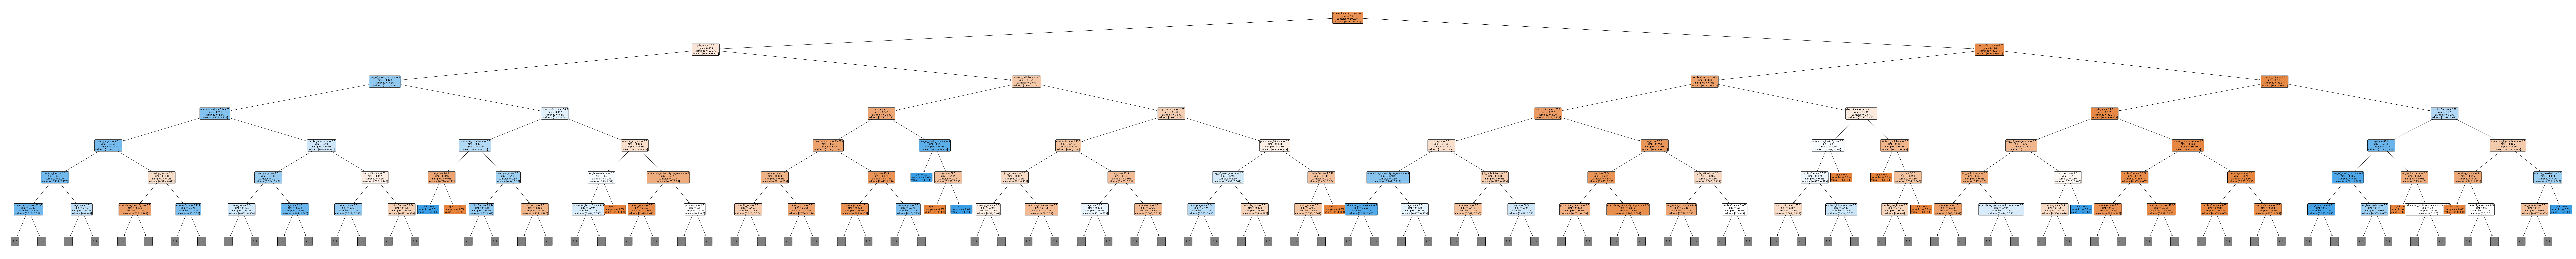

In [28]:
from sklearn import tree

plt.figure(figsize=(200, 20))
tree.plot_tree(dtc,
               filled=True,
               rounded=True,
               max_depth=6,
               proportion=True,
               fontsize=10,
               feature_names=X_train.columns)
plt.show()

Compute the accuracy of the model on the training data and then on the test data, what can you tell?

**JK NOTES ON **

**The accuracy_score **

The accuracy_score from sklearn.metrics is a function used to evaluate the performance of a classification model. When working with decision trees or any other classifier in Scikit-Learn, this function helps to measure the accuracy of the model's predictions.

Here's a breakdown of how it works:

accuracy_score(y_true, y_pred)
y_true: This parameter refers to the true target values or the actual labels from your dataset.

y_pred: This parameter represents the predicted target values generated by your model.

The function compares the y_true (actual labels) with the y_pred (predicted labels) and calculates the accuracy, which is the fraction of correctly classified samples out of the total samples. The formula for accuracy is:

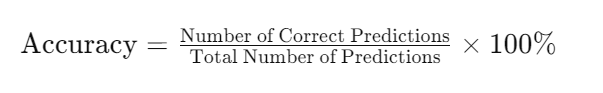

This metric is commonly used in classification tasks to gauge how well the model predicts the correct class labels for the given data. The higher the accuracy score (closer to 1.0 or 100%), the better the model's performance in correctly predicting the classes.

When using decision trees or any other classification algorithm in Scikit-Learn, after training your model and making predictions on a test set, you can use accuracy_score to assess how well your model performs in terms of classification accuracy.

In [29]:
# Your code here...
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, dtc.predict(X_train)))
print(accuracy_score(y_test, dtc.predict(X_test)))


0.9961846623426173
0.8392813789754795


Now let's investigate a bit more by looking at the `classification_report` (you can import it from `sklearn.metrics`) for our test set. That will provide us with more information about precision and recall on both our classes.

**JK NOTES ON**

**The classification_report**


The classification_report function from sklearn.metrics is a helpful tool for evaluating the performance of a classification model in more detail than just accuracy. It provides a comprehensive report containing various metrics such as precision, recall, F1-score, and support for each class in the dataset.

**JK NOTES ON**

**Precision, Recall, F1-score, and Support:**

**Precision:** It measures the accuracy of the positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives. High precision means low false positive rate.

**Recall (Sensitivity):** It calculates how many of the actual positives were captured by the model. It's the ratio of correctly predicted positive observations to all the actual positives.

**F1-score:** It's the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score reaches its best value at 1 and worst at 0.

**Support:** The number of actual occurrences of the class in the specified dataset.

When you call classification_report, you pass the true target values (y_test) and the predicted target values (y_pred) to the function. It then computes and prints out a report containing precision, recall, F1-score, and support for each class in your dataset. This breakdown is helpful in understanding how well the model performs for different classes and whether it might be biased towards certain classes or performing well uniformly across all classes.

This report is particularly useful when dealing with imbalanced datasets or when you need a more nuanced understanding of the model's performance beyond a single accuracy metric.

In [30]:
# Your code here...
from sklearn.metrics import classification_report

print(classification_report(y_test, dtc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10965
           1       0.31      0.34      0.32      1392

    accuracy                           0.84     12357
   macro avg       0.61      0.62      0.62     12357
weighted avg       0.85      0.84      0.84     12357



It looks like our model is predicting the majority class `0` (no) really well, which leads to a high accuracy, but we're really bad at predicting class `1`, which corresponds to successful campaigns and is of interest here!

# Part 2: Parameter Tuning and Feature Importance

## Parameter tuning

We've found two major issues with our model so far:

- It greatly overfits
- It focuses on the majority class

With our decision tree, we can address both.

- For the first issue we will need to tune `max_depth` and `min_samples_split`.
- For the second issue, we will set `class_weight='balanced'` so that it automatically gives more weight to our minority class as a way to compensate.

### Exploration of different parameters

Let's use more sensible/constraining values for `max_depth` and `min_samples_split`, let's say `6` and `20` respectively.

To change the parameters of the existing tree classifier `dtc`, you can use `set_params` on it with the name and values you want to update (for example `max_depth=6`).

Don't forget to re-train the tree after changing the parameters.

In [31]:
# Your code here...
dtc.set_params(max_depth=6, min_samples_split=20)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_split=20)

Let's check the accuracy on both the train and the test set. Is it better than before?

In [32]:
# Your code here...
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, dtc.predict(X_train)))
print(accuracy_score(y_test, dtc.predict(X_test)))


0.9051715167701433
0.9002994254268836


We can also visualise our tree:

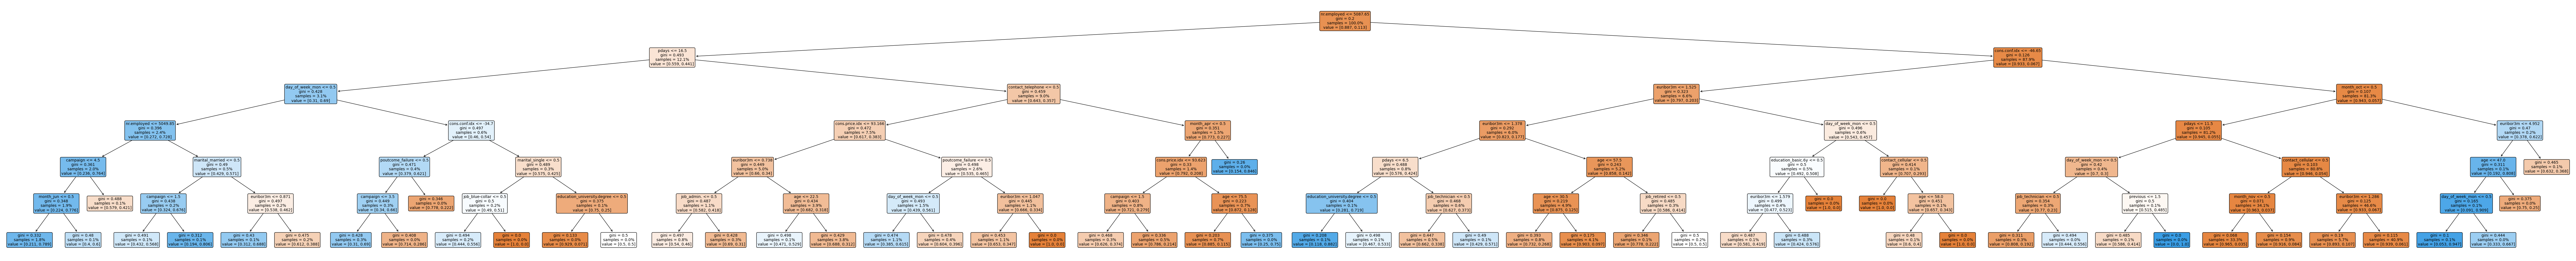

In [33]:
plt.figure(figsize=(120, 12))
tree.plot_tree(dtc,
               filled=True,
               rounded=True,
               max_depth=6,
               proportion=True,
               fontsize=10,
               feature_names=X_train.columns)
plt.show()

That's a simpler tree!

Let's have a look at the classification report now for the test set:

In [34]:
# Your code here...
dtc.fit(X_train, y_train)
print(classification_report(y_test, dtc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.64      0.25      0.36      1392

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357



It is still doing really badly on class `1`. Try to set the parameter `class_weight` to `"balanced"` and retrain the tree:

**JK NOTES ON**

**set_params(class_weight="balanced") **


In Scikit-Learn, the class_weight parameter in a Decision Tree (and other classifiers) is used to assign different weights to classes in a dataset. The "balanced" option is a shorthand way to automatically adjust the weights inversely proportional to class frequencies in the input data.

Here's what set_params(class_weight="balanced") means in the context of a Decision Tree:

Imbalanced Classes:
In many real-world classification problems, the classes might not be evenly distributed. For instance, you might have significantly more samples of one class than another. When the classes are imbalanced, models might become biased towards the majority class and perform poorly in predicting the minority class.

class_weight="balanced":

Setting class_weight="balanced" in a Decision Tree assigns weights to classes based on their frequencies in the input data. Essentially, it adjusts the training algorithm by giving higher weight to the minority class and lower weight to the majority class. The goal is to balance the influence of different classes during model training.

This adjustment helps the model to learn from the minority class examples more effectively, potentially improving its ability to correctly predict the minority class.

**JK NOTES ON **

**Impact on Training:**

By using class_weight="balanced", the Decision Tree classifier prioritizes correctly classifying the minority class instances, which might lead to improved performance metrics like recall and F1-score, especially when dealing with imbalanced datasets.

However, it's important to note that while this approach helps in certain cases, it might not always be the optimal solution. It's advisable to experiment and fine-tune different strategies based on the specific characteristics of your dataset and the problem you're addressing.

In summary, class_weight="balanced" in a Decision Tree is a way to mitigate the impact of class imbalance by adjusting the importance of different classes during model training, aiming to improve overall predictive performance.

In [35]:
# Your code here...
dtc.set_params(class_weight="balanced")
dtc.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=20)

Check the classification report again:

In [36]:
# Your code here...
print(classification_report(y_test, dtc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10965
           1       0.40      0.61      0.48      1392

    accuracy                           0.85     12357
   macro avg       0.67      0.75      0.70     12357
weighted avg       0.89      0.85      0.87     12357



That's much better!

### Use grid search to find the optimal parameters

Now that we've observed the impact of various parameters, we can do a grid search to find the optimal ones.

Define a new `parameters` dictionary that contains all the values you want to try for `max_depth` and `min_samples_split`.

Then define a new `GridSearchCV` object and find the best parameters.

When searching for the best parameters, we typically select the ones which give the best results on the validation set, which is distinct from the training and test sets. `GridSearchCV` includes cross-validation, so we can pass it the training data directly. As part of cross-validation, the original training data will be repeatedly split into various training and validation sets.

**JK NOTES ON **

**MODEL_SELECTION IMPORT GRIDSEARCHCV**

GridSearchCV in Scikit-Learn is a technique used for hyperparameter tuning, and it's incredibly useful when working with algorithms like Decision Trees.

**Hyperparameter Tuning:**
Hyperparameters are settings or configurations that aren't learned from the data but are set before the learning process begins. For Decision Trees, hyperparameters could include the maximum depth of the tree, the minimum number of samples required to split an internal node, the criterion for splitting, etc.

**GridSearchCV:**
GridSearchCV stands for Grid Search Cross-Validation. It's a method that exhaustively tries all combinations of hyperparameters specified in a grid to find the best combination that yields the highest performance for a given model.

**param_grid:** This is a dictionary where keys are hyperparameters, and values are lists of values for each hyperparameter to try.

**cv:** It specifies the number of folds for cross-validation. In this case, cv=5 means 5-fold cross-validation is used.

**scoring:** It defines the evaluation metric to use for selecting the best model. In this case, **'accuracy' **is used.

**GridSearchCV** exhaustively tries all combinations of hyperparameters provided in **param_grid,** using cross-validation to evaluate each combination's performance. It then selects the best set of **hyperparameters** based on the specified scoring metric.

This technique is **powerful for fine-tuning models**, especially when dealing with Decision Trees where the choice of hyperparameters significantly impacts the model's performance.

**JK NOTES ON**

**parameters  = [{'max_depth': [3, 4, 7], "min_samples_split": [5, 10, 20]}]**

The parameters list of dictionaries you've provided is a specific configuration used as the param_grid argument within GridSearchCV for hyperparameter tuning.

Each dictionary within the list represents a set of hyperparameters that the GridSearchCV will use to construct a grid of parameters to search through during the tuning process.

**max_depth: **  It represents the maximum depth of the decision tree. For each value specified in the list [3, 4, 7], GridSearchCV will create a decision tree with that max_depth.

**min_samples_split:** This parameter represents the minimum number of samples required to split an internal node. For each value specified in the list [5, 10, 20], GridSearchCV will create decision trees using these different values for min_samples_split.

Combinations created by GridSearchCV:
GridSearchCV will create a grid with all possible combinations of these hyperparameters. In this case, it will generate nine combinations:

max_depth=3, min_samples_split=5

max_depth=3, min_samples_split=10

max_depth=3, min_samples_split=20

max_depth=4, min_samples_split=5

max_depth=4, min_samples_split=10

max_depth=4, min_samples_split=20

max_depth=7, min_samples_split=5

max_depth=7, min_samples_split=10

max_depth=7, min_samples_split=20

**GridSearchCV Execution:**

GridSearchCV will then evaluate each combination using the **cross-validation strategy** (defined by the cv parameter) and the **scoring metric** (defined by the scoring parameter). It will train a Decision Tree for each combination and select the one that performs the best according to the specified metric.

This approach is effective for exploring various **combinations of hyperparameters** in a systematic manner and finding the **optimal configuration** that maximizes the model's performance for a given dataset and problem.

**JK NOTES ON**

**gridCV = GridSearchCV(dtc, parameters, cv=10)**

**GridSearchCV:** This is a method in Scikit-Learn used for hyperparameter tuning through an exhaustive search over a specified parameter grid.

**dtc:** This typically refers to an instance of a Decision Tree Classifier (DecisionTreeClassifier in Scikit-Learn). It's the estimator object that will be used to fit the data for various combinations of hyperparameters.

**parameters:** It represents the hyperparameter grid to search through. In your example, parameters is a list of dictionaries, where each dictionary contains hyperparameters and their respective values to be tried.

**cv=10:** This parameter specifies the number of folds for cross-validation. In this case, cv=10 means that the dataset will be divided into 10 equal parts (or folds). The model will be trained and evaluated 10 times, using each fold once as the validation set while the remaining data acts as the training set. This helps to ensure robustness and reliability of the model's performance evaluation.

**What GridSearchCV Does:**
The GridSearchCV object takes these inputs and performs an exhaustive search over all possible combinations of hyperparameters specified in parameters. For each combination:

**1) It uses cross-validation** (cv=10) to evaluate the model's performance using the provided dtc (Decision Tree Classifier) with the specific hyperparameters.

**2) It computes the evaluation metric** (defined by the scoring parameter, which defaults to accuracy for classification tasks) for each combination and stores the results.

After **GridSearchCV** is fitted to the data **(X_train, y_train), the gridCV** object will contain the best combination of hyperparameters found during the search, allowing you to access it using the **best_params_** attribute. Additionally, you can retrieve the **best estimator** using best_estimator_ and the **best score** using best_score_.

In [38]:
# Your code here...
from sklearn.model_selection import GridSearchCV

parameters  = [{'max_depth': [3, 4, 7], "min_samples_split": [5, 10, 20]}]

gridCV = GridSearchCV(dtc, parameters, cv=10)

gridCV.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=6,
                                              min_samples_split=20),
             param_grid=[{'max_depth': [3, 4, 7],
                          'min_samples_split': [5, 10, 20]}])

What are your best parameters?

**JK NOTES ON**

**BEST PARAMETERS**

GridSearchCV in Scikit-Learn for hyperparameter tuning, gridCV.best_params_ refers to an attribute that holds the set of hyperparameters that yielded the best performance based on the chosen evaluation metric during the grid search.

After performing an exhaustive search over all combinations of hyperparameters specified in the grid, GridSearchCV stores information about the best-performing set of hyperparameters found during the search process

**Understanding gridCV.best_params_:**

When you access gridCV.best_params_, you retrieve a dictionary containing the hyperparameters that resulted in the highest score or performance metric during the cross-validation process.

Once the grid search is complete and you access gridCV.best_params_, it will provide you with the specific combination of hyperparameters (e.g., 'max_depth': 4, 'min_samples_split': 10) that achieved the highest performance according to the specified evaluation metric (e.g., accuracy if not explicitly specified).

This will output SHOWN BELOW the best set of hyperparameters that GridSearchCV found during the search, allowing you to use this information to build the best-performing model for your dataset.

In [39]:
# Your code here...
## max_depth': 4
## min_samples_split': 10

gridCV.best_params_


{'max_depth': 4, 'min_samples_split': 10}

Now we can re-train our model using these parameters. Set the parameters of the tree to be the best ones given by the grid search, and train the model again:

In [40]:
# Your code here...
dtc.set_params(**gridCV.best_params_)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=10)

Display the final tree:

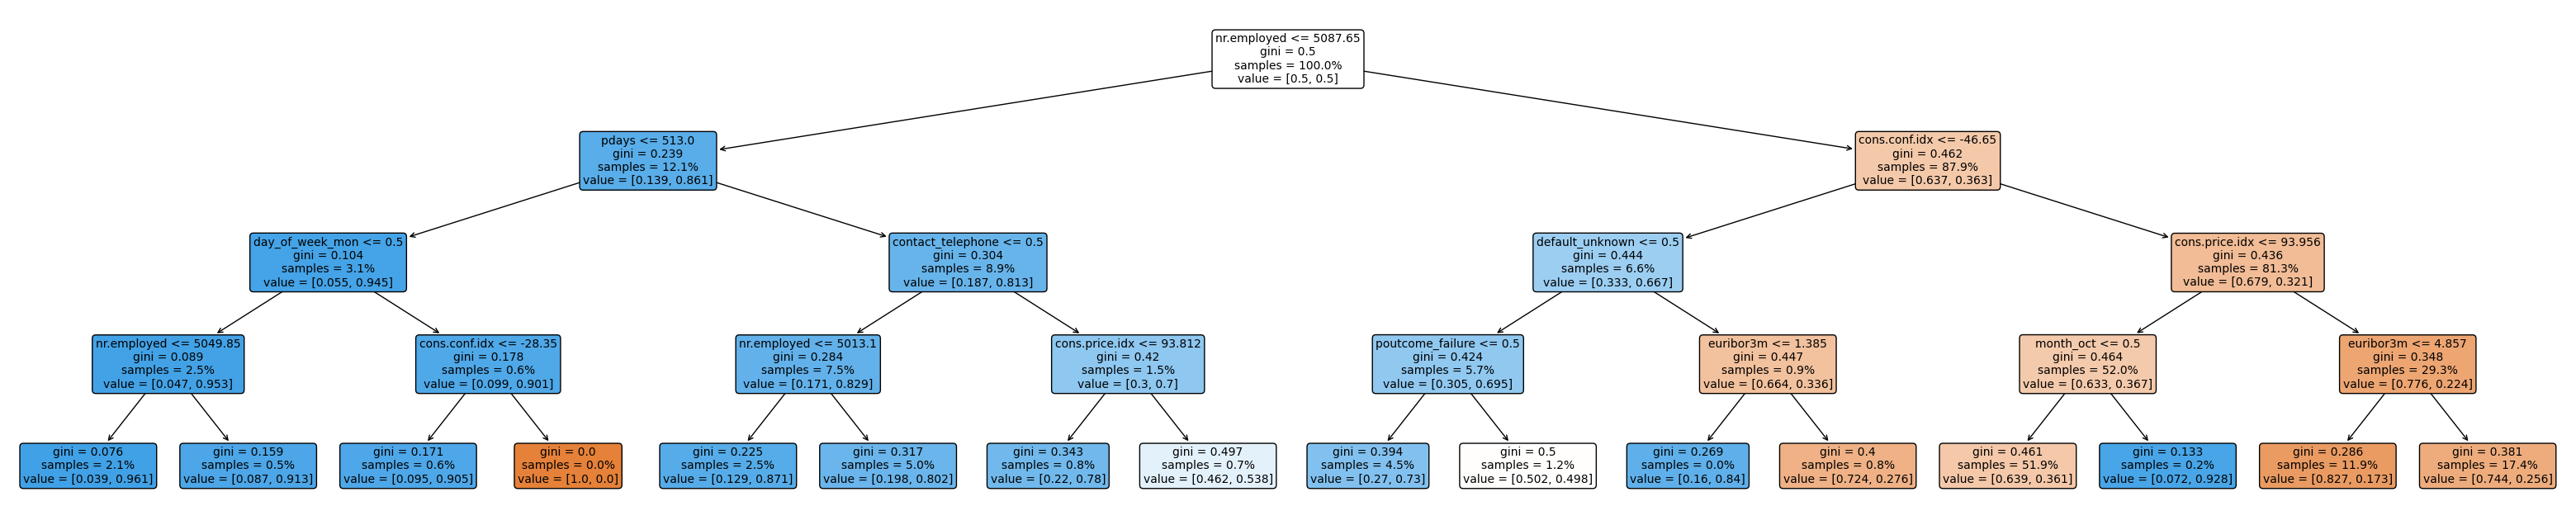

In [41]:
plt.figure(figsize=(40, 8))
tree.plot_tree(dtc,
               filled=True,
               rounded=True,
               max_depth=6,
               proportion=True,
               fontsize=10,
               feature_names=X_train.columns)
plt.show()

Compute its accuracy on the train and test sets:

In [42]:
# Your code here...
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, dtc.predict(X_train)))
print(accuracy_score(y_test, dtc.predict(X_test)))


0.8517567895667858
0.8549000566480537


Finally check the classification report for the test set:

In [43]:
# Your code here...
print(classification_report(y_test, dtc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92     10965
           1       0.40      0.61      0.49      1392

    accuracy                           0.85     12357
   macro avg       0.68      0.75      0.70     12357
weighted avg       0.89      0.85      0.87     12357



## Feature importance

Decision trees have the advantage of providing a feature importance, a score allowing you to rank all features by their importance for the model when predicting the outcome. With `sklearn`, you can access it with the attribute called `feature_importances_`.

Take a look at the `feature_importances_` attribute:

**JK NOTES ON **

**feature_importances_**


 dtc.feature_importances_ for decision tree
ChatGPT
Absolutely! dtc.feature_importances_ in a Decision Tree Classifier (dtc) is an attribute that provides insight into the importance of each feature in the dataset for making predictions.

Feature Importance in Decision Trees:
Decision Trees make splits in the data based on features that best separate the target variable (the class or outcome). The importance of a feature is determined by how much it contributes to reducing the impurity or uncertainty within the nodes of the tree.

dtc.feature_importances_:
When a Decision Tree is trained on a dataset, this attribute (feature_importances_) stores the importance of each feature after the model has been fitted to the data.

**Feature Importance in Decision Trees:**

Decision Trees make splits in the data based on features that best separate the target variable (the class or outcome). The importance of a feature is determined by how much it contributes to reducing the impurity or uncertainty within the nodes of the tree.

dtc.feature_importances_:
When a Decision Tree is trained on a dataset, this attribute (feature_importances_) stores the importance of each feature after the model has been fitted to the data.

**Interpretation of dtc.feature_importances_:**

The values in **dtc.feature_importances_** range between **0 and 1.**
Higher values indicate higher importance of the corresponding feature for making predictions.
The sum of all values in **feature_importances_** will be 1.

**Usefulness:**

Feature importance helps in understanding which features are more influential in the model's decision-making process.
It aids in feature selection by identifying the most important features that contribute significantly to the model's predictive power.
This information can guide you in simplifying models by focusing on the most relevant features or in performing dimensionality reduction.

When using a Decision Tree Classifier in Scikit-Learn, dtc.feature_importances_ is a valuable attribute that allows you to gain insights into the relative importance of different features in your dataset, helping you understand their impact on the model's predictions.

In [44]:
# Your code here...
dtc.feature_importances_


array([0.00000000e+00, 0.00000000e+00, 1.66244462e-02, 0.00000000e+00,
       0.00000000e+00, 4.63666379e-02, 1.40111223e-01, 8.07672670e-03,
       7.40932081e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.21241844e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.68046022e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.20703748e-02, 0.00000000e+00, 0.00000000e+00, 5.60961983e-04,
      

That's hard to read. The array gives a number for each column in our training set, in the same order. A better way to visualise it would be to put it in a table, so let's do that.

Create a new DataFrame where the data will be the feature importances from above, and the index will be the list of columns from our training data. Call this DataFrame `importances_df`.

**JK NOTES ON **

**EXPLAIN THE CODE BELOW: **

**Explanation:**

**1) pd.DataFrame():** This creates a new DataFrame using Pandas.

**2) dtc.feature_importances_:** The feature_importances_ attribute of the dtc (Decision Tree Classifier) contains the importance of each feature learned during training.

**3) columns=["importance"]:** This specifies the name of the column in the DataFrame where the feature importances will be stored. Here, it's named "importance".

**4) index=X_train.columns:** X_train.columns refers to the column names of the training dataset X_train. This sets the index of the DataFrame to be the same as the column names of the training data, associating each importance value with its corresponding feature name.

**5) importances_df.sort_values("importance", ascending=False).head():**

**sort_values("importance", ascending=False):** This sorts the DataFrame by the "importance" column in descending order (ascending=False), arranging the features with **higher importance values at the top**.
**.head():** This retrieves the top rows of the DataFrame, by default the first five rows, showing the features with the highest importance.

In [45]:
# Your code here...
importances_df = pd.DataFrame(
    dtc.feature_importances_,
    columns=["importance"],
    index=X_train.columns
)
importances_df.sort_values("importance", ascending=False).head()


,importance
nr.employed,0.740932
cons.conf.idx,0.140111
cons.price.idx,0.046367
month_oct,0.022070
pdays,0.016624


THE ABOVE SHOWS THE MAIN IMPORTANT FEATURES THESE INCLUDE:

nr.employed

cons.conf.idx

cons.price.idx

month_oct

pdays




**JK NOTES ON **

**CODE BELOW**

**importances_df.sort_values("importance", ascending=False):** This sorts the DataFrame importances_df (containing feature importances) by the "importance" column in descending order. It arranges the features from the **most important to the least important.**

**.plot(kind="bar", figsize=(20, 7)):** This command creates a bar plot of the **sorted feature importances**.

**kind="bar"** specifies that the plot will be a bar plot.
**figsize=(20, 7) ** sets the size of the figure to **20 inches in** **width and 7 inches in height**. **bold text** **bold text**

This helps adjust the visual aspect of the plot.
**plt.show():**
This displays the generated plot using Matplotlib's show() function.

**Purpose:**

This code snippet is useful for visualizing the relative importance of features obtained from a Decision Tree model. The resulting bar plot will show the importance values for each feature, with the most important features on the left and descending down to the least important on the right.

**Usage:**

When working with complex datasets and models such as Decision Trees, visualizing feature importances can provide valuable insights into which features contribute the most to the model's predictions. Identifying and understanding these important features can aid in feature selection, model interpretation, and potentially in improving model performance.

Plot it as a bar plot:

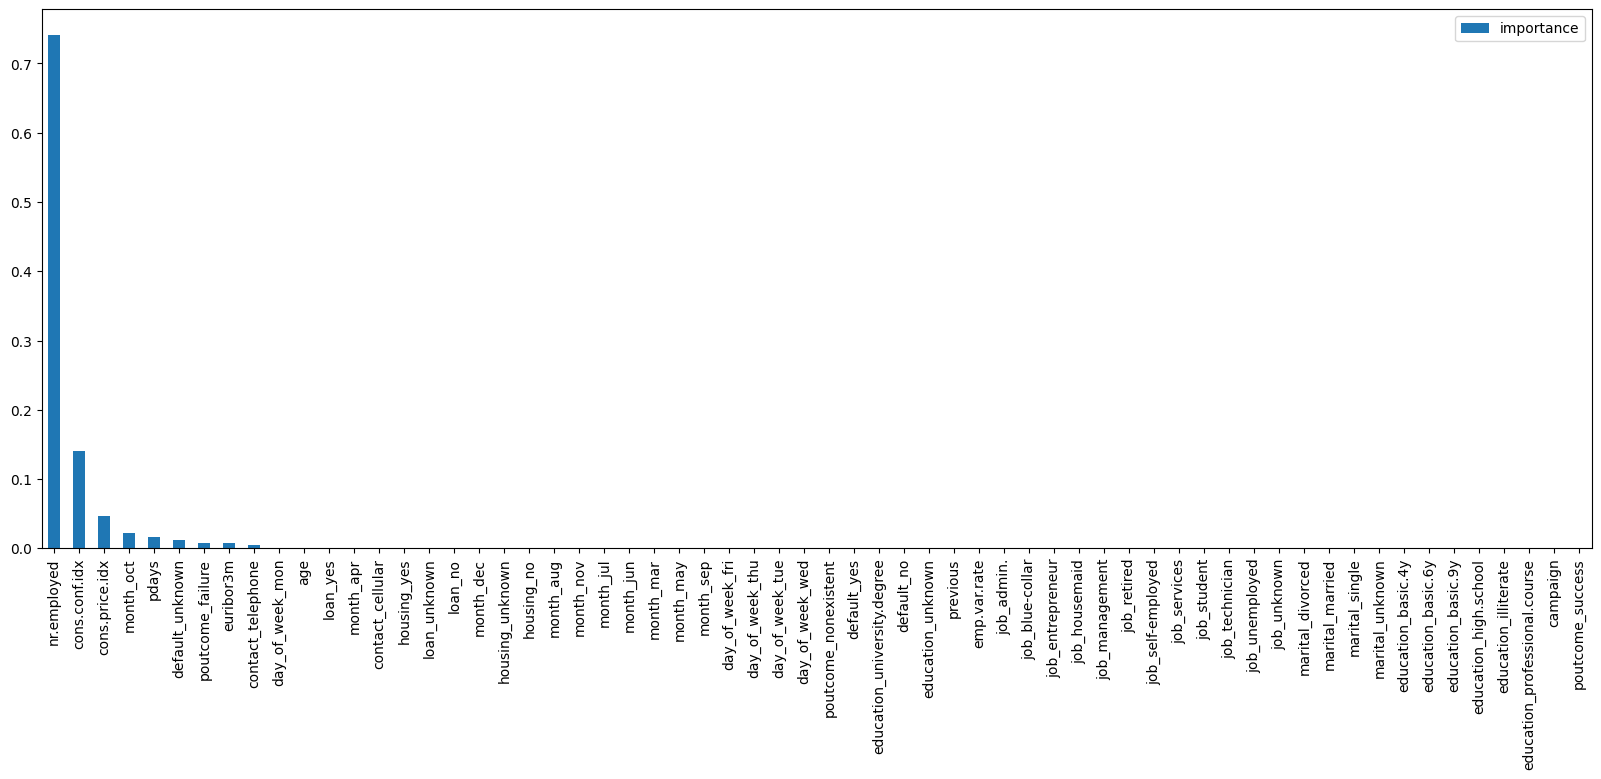

In [46]:
# Your code here...
importances_df.sort_values("importance", ascending=False).plot(kind="bar", figsize=(20,7))
plt.show()


What's the most important feature?

In [48]:
importances_df.sort_values("importance", ascending=False).head(1)

,importance
nr.employed,0.740932
